In [99]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [178]:
def countplot(df, col, rotate=False):
    """
    draw a countplot for given column 
    Input: dataframe and column
    Output: Countplot 
    """
    fig, ax = plt.subplots(figsize=(7,4))
    g = sns.countplot(df[col],order=df[col].value_counts().index.tolist())
    ax.set_title(col+ ' distribution')
    ylabels = ['{:,.0f}'.format(y) + 'K' for y in g.get_yticks()/1000]
    g.set_yticklabels(ylabels)
    if rotate:
        ax.tick_params(axis='x', rotation=90)
    plt.show()

## 1: Load Data:

In [87]:
profiles = pd.read_json('../starbuck_capstone/data/profile.json',orient='records',lines=True)
transcripts = pd.read_json('../starbuck_capstone/data/transcript.json',orient='records',lines=True)
promotions = pd.read_json('../starbuck_capstone/data/portfolio.json',orient='records',lines=True)

In [79]:
print('shape of profile:',profiles.shape)
print('shape of transcript:',transcripts.shape)
print('shape of promotions:',promotions.shape)

shape of profile: (17000, 5)
shape of transcript: (306534, 4)
shape of promotions: (10, 6)


## 2: Data Cleaning:

### 2.1: Transcript:

In [24]:
transcripts

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [25]:
transcripts.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

__Issues:__
1. Transactions and offers are in single column. 
2. Time seems to bit out of order. 

1.Transactions and offers are in single column. 

In [26]:
def fetch_from_json(json):
    try:
        return json['amount']
    except(KeyError):
        if 'offer id' in json:
            return json['offer id']
        else:
            return json['offer_id']
    


def separate_tran_offer(df):
    cols = ['offer received','offer viewed','offer completed']
    # add offer where col exist # 
    df.loc[df.event.isin(cols),"offer"] = (df.loc[df.event.isin(cols),"value"]).apply(fetch_from_json)
    # add amount where transaction exist #
    df.loc[df.event=='transaction',"amount"] = df.loc[df.event=='transaction',"value"].apply(fetch_from_json)
    df.drop(['value'],axis=1, inplace=True)
    return df

separate_tran_offer(transcripts).head(5)

,person,event,time,offer,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


2. Time seems to bit out of order. 

-------leave it for the moment-----

### 2.2: Promotions:

In [27]:
promotions

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


__Issues:__
1. Channels are in the form of list in a single column. 
2. Multiple columns such as diffculty, duration and offer type for a single promotion. 

1. Channels are in the form of list in a single column. 

In [29]:
def one_hot_channel(df):
    """
    create separate column for each channel
    Input: dataframe 
    Output: dataframe containing separate columns for each channel
    """
    # make a copy #
    df = df.copy()
    # create a list of all channels #
    channels = df.channels.max()
    # create separate column for each channel #
    for channel in channels:
        df[channel] = df['channels'].apply(lambda channels: 1 if channel in channels else 0)
    
    # drop the channels column # 
    df.drop(['channels'],axis=1,inplace=True)
    return df
        
one_hot_channel(promotions)

,reward,difficulty,duration,offer_type,id,web,email,mobile,social
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,1,0


2. Multiple columns such as diffculty, duration and offer type for a single promotion. 

In [84]:
def merge_cols_promotions(df):
    """
    merge columns (dfficulty, duration, reward and offer type) in single column 
    
    Input: dataframe 
    Output: dataframe contains a merge column for promotion 
    """
    # make a copy of the dataframe #
    df = df.copy()
    # merge columns # 
    df.loc[:,'promotion'] = df['offer_type'].astype(str)+'_'+df['reward'].astype(str)+'_'+ \
                                                df['difficulty'].astype(str)+'_'+df['duration'].astype(str)
    # drop the individual columns # 
    #df.drop(['reward','offer_type','duration','difficulty'],axis=1, inplace=True)
    return df 

merge_cols_promotions(promotions)


,reward,channels,difficulty,duration,offer_type,id,promotion
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,bogo_10_10_7
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo_10_10_5
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,informational_0_0_4
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo_5_5_7
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount_5_20_10
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,discount_3_7_7
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,discount_2_10_10
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,informational_0_0_3
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,bogo_5_5_5
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5,discount_2_10_7


### 2.3: Profiles:

In [39]:
profiles

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [40]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
gender              14825 non-null object
age                 17000 non-null int64
id                  17000 non-null object
became_member_on    17000 non-null int64
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


__Issues:__
1. Date is not in format (became member on). 
2. There are missing values in gender (as None), income (as NaN) and in some place is age is abnormal (for instance 118). 

1. Date is not in format (became member on). 

In [45]:
def convert_into_dateformat(df, col):
    """
    Function to convert date into pandas datatime format. 
    
    Input: dataframe and column (contain date)
    Output: dataframe containing date (date time format)
    """
    # make a copy of dataframe #
    df = df.copy()
    # convert it into string #
    df[col] = df[col].astype(str)
    df[col] = pd.to_datetime(df[col])
    
    return df

convert_into_dateformat(profiles,'became_member_on')

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0


2. There are missing values in gender (as None), income (as NaN) and in some place is age is abnormal (for instance 118)

- gender:

In [70]:
round((profiles.gender.value_counts(dropna=False)/len(profiles))*100,2)

M      49.91
F      36.05
NaN    12.79
O       1.25
Name: gender, dtype: float64

- income:

In [69]:
round((profiles.income.isnull().sum()/len(profiles))*100,2)

12.79

- age:

In [68]:
round((((profiles.age > 100).sum())/len(profiles))*100,2)

12.82

__Observation__:

- income and geneder are about 12.7% missing. 
- age is slightly higher than the rest of two which is 12.8%. (although they aren't missing they just have value greater than 100). 

-----leave it for the moment---

## 3. Data Integration: 

In [216]:
def merge_data(profile_dt, transcript_dt, promotions_dt):
    """
    Function to merge all three datasets (profiles, promotions and transcripts)
    
    Input: dataframe for profiles, promotions and transcripts 
    Output: merged dataframe
    """
    profile_dt = profile_dt.copy()
    transcript_dt = transcript_dt.copy()
    promotions_dt = promotions_dt.copy()
    # 1. cleaning of datasets: 
    
    # clean transcript data #
    transcript_dt = separate_tran_offer(transcript_dt)
    # clean promotions data #
    promotions_dt = one_hot_channel(promotions_dt)
    promotions_dt = merge_cols_promotions(promotions_dt)
    # clean profile data #
    profile_dt = convert_into_dateformat(profile_dt,'became_member_on')
    
    # merge datasets: 
    
    # merge transcript and promotions # 
    trans_pro_dt = transcript_dt.merge(promotions_dt,how="left", left_on="offer", right_on="id").drop('id', axis=1)
    # merge profile to the recent merged dataframe #
    trans_pro_profile_dt = trans_pro_dt.merge(profile_dt,how="left", left_on="person", right_on="id").drop('id', axis=1)
    
    return trans_pro_profile_dt

In [217]:
merged_dt = merge_data(profiles,transcripts,promotions)

In [218]:
merged_dt

,person,event,time,offer,amount,reward,difficulty,duration,offer_type,web,email,mobile,social,promotion,gender,age,became_member_on,income
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,5.0,7.0,bogo,1.0,1.0,1.0,0.0,bogo_5_5_7,F,75.0,2017-05-09,100000.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,5.0,20.0,10.0,discount,1.0,1.0,0.0,0.0,discount_5_20_10,NaN,NaN,NaT,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,2.0,10.0,7.0,discount,1.0,1.0,1.0,0.0,discount_2_10_7,M,68.0,2018-04-26,70000.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,2.0,10.0,10.0,discount,1.0,1.0,1.0,1.0,discount_2_10_10,NaN,NaN,NaT,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,10.0,10.0,5.0,bogo,1.0,1.0,1.0,1.0,bogo_10_10_5,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,NaN,1.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,66.0,2018-01-01,47000.0
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,NaN,9.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,52.0,2018-04-08,62000.0
306531,a00058cf10334a308c68e7631c529907,transaction,714,NaN,3.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,63.0,2013-09-22,52000.0
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,NaN,3.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,57.0,2016-07-09,40000.0


## 4. Data Visualization: 

1. `event` distribution. 

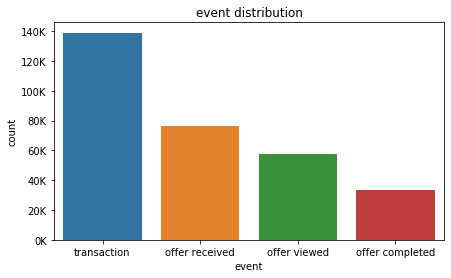

In [219]:
countplot(merged_dt, 'event')

2. Distribution of `amount`,`reward`,`difficulty` and `duration`

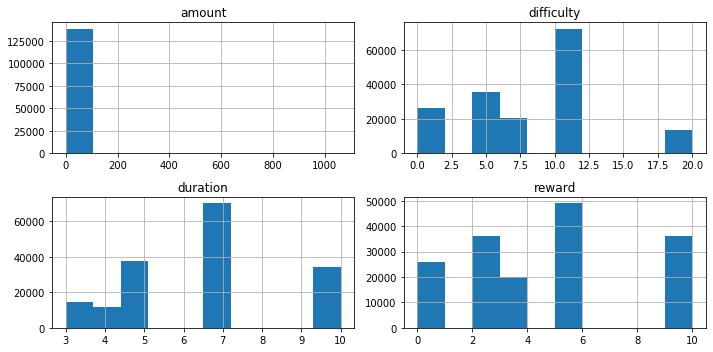

In [220]:
col = ['amount','reward','difficulty','duration']
merged_dt[col].hist(figsize=(10,5))
plt.tight_layout()

3. `offer type` distribution.

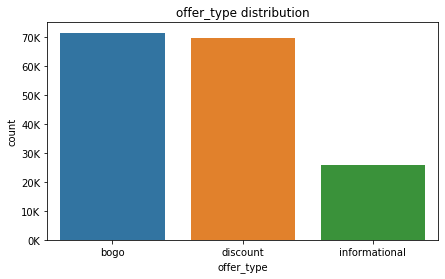

In [221]:
countplot(merged_dt, 'offer_type')

4. Distribtution of `offer recieved,viewed,completed` w.r.t `offer type`

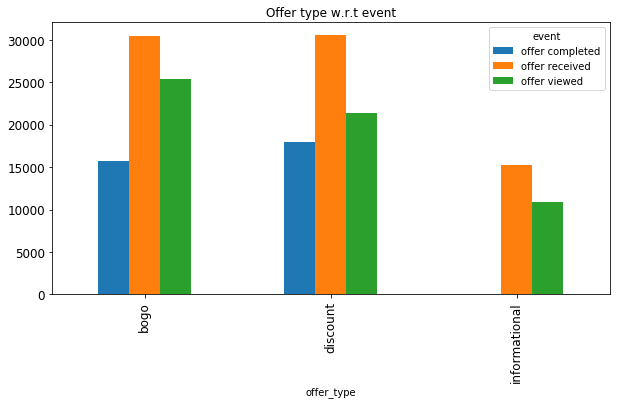

In [222]:
merged_dt.groupby(by=['offer_type','event']).size().unstack().plot(kind="bar",figsize=(10,5)\
                                                                   ,title='Offer type w.r.t event',fontsize=12)
plt.show()

5. `promotion` distribution.

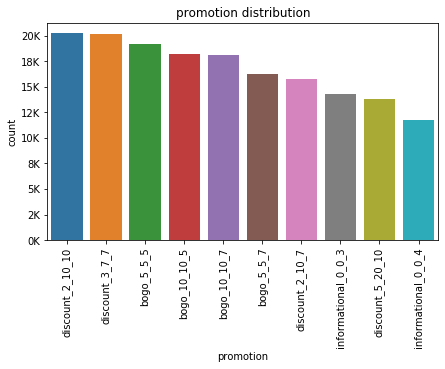

In [223]:
countplot(merged_dt, 'promotion',rotate=True)

6. Ratio of `promotions` `received`

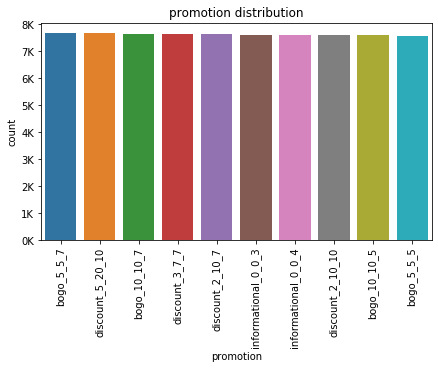

In [224]:
received = merged_dt[merged_dt['event']=='offer received']
countplot(received,'promotion',rotate=True)

All promotions have equal received ratio. 

7. Distribution of  `gender`,`age` and `income` 

In [225]:
cols = ['gender','age','income']

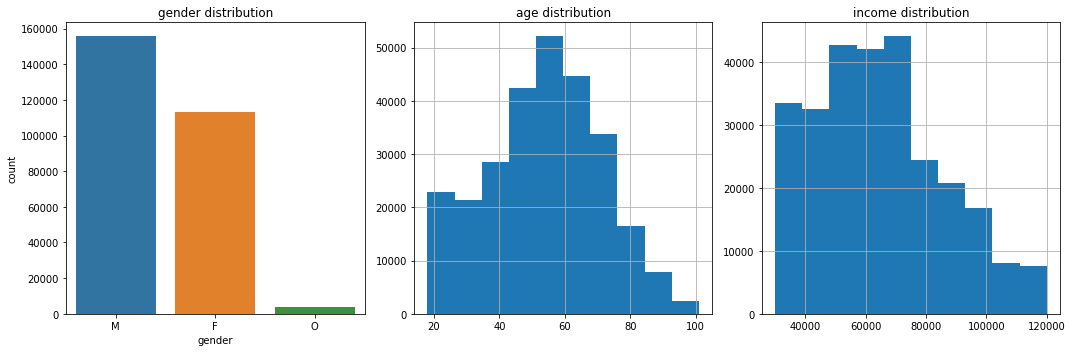

In [226]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
# Visualization for the gender #
for i,col in enumerate(cols):
    if col=='gender':
        sns.countplot(merged_dt[col],ax=ax[i],order=merged_dt[col].value_counts().index.tolist())
        ax[i].set_title('gender distribution')
    else:
        merged_dt[col].hist(ax=ax[i])
        ax[i].set_title(str(col)+' distribution')
    plt.tight_layout()

1. Ratio: Male --> female and Other 
2. Age has an abnoral peak at 120. (Above 100 it doesn't make sense). 
3. income is nearly normal (bit right skewed -- some are earning more than many). 

8. `gender` with `income`

In [227]:
profiles = profiles[profiles['income'].notnull()]

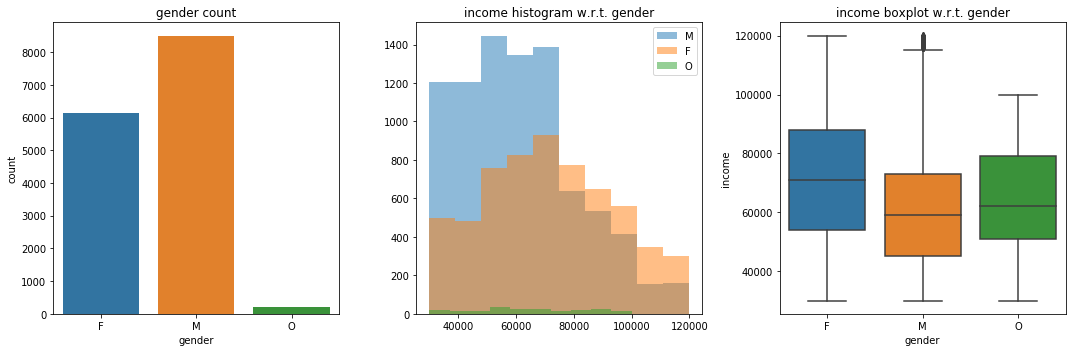

In [228]:
"""
Gender with income
"""

fig, ax = plt.subplots(ncols=3, figsize=(15,5))

# countplot of gender #
sns.countplot(profiles['gender'],ax=ax[0])
ax[0].set_title('gender count')

# histogram of income w.r.t income #
ax[1].hist(profiles[profiles.gender == 'M']['income'], alpha=0.5, label='M')
ax[1].hist(profiles[profiles.gender == 'F']['income'], alpha=0.5, label='F')
ax[1].hist(profiles[profiles.gender == 'O']['income'], alpha=0.5, label='O')
ax[1].set_title('income histogram w.r.t. gender')
ax[1].legend()

# boxplot of income w.r.t to income #
sns.boxplot(profiles['gender'], profiles['income'],ax=ax[2])
ax[2].set_title('income boxplot w.r.t. gender')

plt.tight_layout()
plt.show()

1. males have high income compared to females. 
2. Average income of females and others are higher than males. 

In [229]:
transactions = merged_dt[merged_dt['event']=='transaction'].copy()

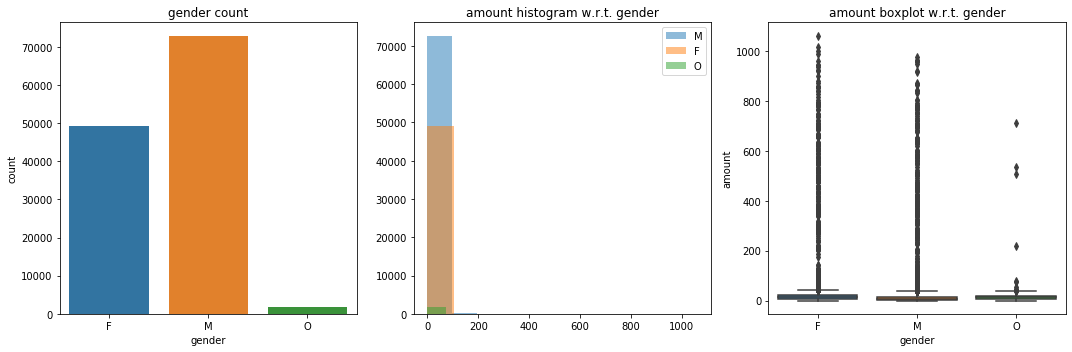

In [230]:
"""
Gender With Spending 
"""
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

# countplot of gender #
sns.countplot(transactions['gender'],ax=ax[0])
ax[0].set_title('gender count')

# histogram of income w.r.t income #
ax[1].hist(transactions[transactions.gender == 'M']['amount'], alpha=0.5, label='M')
ax[1].hist(transactions[transactions.gender == 'F']['amount'], alpha=0.5, label='F')
ax[1].hist(transactions[transactions.gender == 'O']['amount'], alpha=0.5, label='O')
ax[1].set_title('amount histogram w.r.t. gender')
ax[1].legend()

# boxplot of income w.r.t to income #
sns.boxplot(transactions['gender'], transactions['amount'],ax=ax[2])
ax[2].set_title('amount boxplot w.r.t. gender')

plt.tight_layout()
plt.show()

Nothing can be conclude from it. 

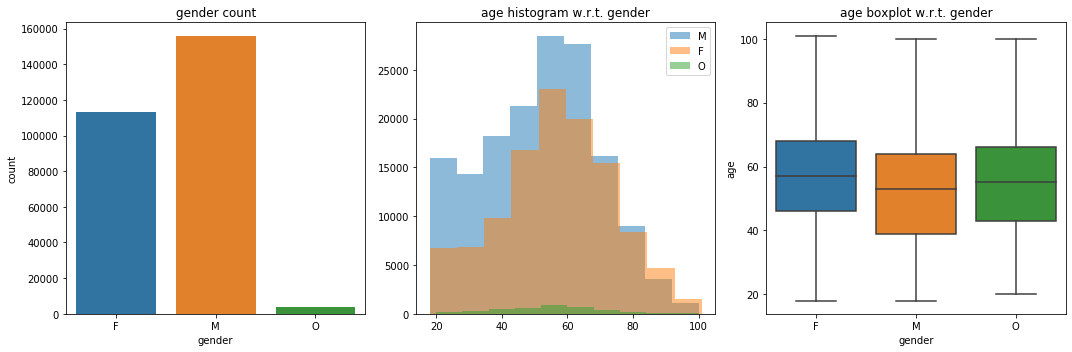

In [234]:
"""
Gender With age 
"""
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

# countplot of gender #
sns.countplot(merged_dt['gender'],ax=ax[0])
ax[0].set_title('gender count')

# histogram of income w.r.t income #
ax[1].hist(merged_dt[merged_dt.gender == 'M']['age'], alpha=0.5, label='M')
ax[1].hist(merged_dt[merged_dt.gender == 'F']['age'], alpha=0.5, label='F')
ax[1].hist(merged_dt[merged_dt.gender == 'O']['age'], alpha=0.5, label='O')
ax[1].set_title('age histogram w.r.t. gender')
ax[1].legend()

# boxplot of income w.r.t to income #
sns.boxplot(merged_dt['gender'], merged_dt['age'],ax=ax[2])
ax[2].set_title('age boxplot w.r.t. gender')

plt.tight_layout()
plt.show()

Not much of a difference in age of different genders. 

In [235]:
merged_dt

,person,event,time,offer,amount,reward,difficulty,duration,offer_type,web,email,mobile,social,promotion,gender,age,became_member_on,income
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,5.0,7.0,bogo,1.0,1.0,1.0,0.0,bogo_5_5_7,F,75.0,2017-05-09,100000.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,5.0,20.0,10.0,discount,1.0,1.0,0.0,0.0,discount_5_20_10,NaN,NaN,NaT,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,2.0,10.0,7.0,discount,1.0,1.0,1.0,0.0,discount_2_10_7,M,68.0,2018-04-26,70000.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,2.0,10.0,10.0,discount,1.0,1.0,1.0,1.0,discount_2_10_10,NaN,NaN,NaT,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,10.0,10.0,5.0,bogo,1.0,1.0,1.0,1.0,bogo_10_10_5,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,NaN,1.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,66.0,2018-01-01,47000.0
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,NaN,9.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,52.0,2018-04-08,62000.0
306531,a00058cf10334a308c68e7631c529907,transaction,714,NaN,3.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,63.0,2013-09-22,52000.0
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,NaN,3.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,57.0,2016-07-09,40000.0
